# Simple regression analysis (by moriitkys 2020/04)
実装は【キカガク流】人工知能・機械学習　脱ブラックボックス講座-初級編-　を参考にしています。  
初心者の方は、pandasの使い方や単回帰分析の解説など、講座の受講をおすすめします。  
【キカガク流】人工知能・機械学習　脱ブラックボックス講座-初級編-  
https://www.udemy.com/course/kikagaku_blackbox_1/learn/lecture/8258758#overview

データセットはsklearnで取得できるボストンの地域別住宅価格のデータセットを用いました。部屋の数RMをxとして家賃Priceを予測します。

## 環境
Anaconda3  
pandas==0.23.0  
scikit-learn==0.19.1  
seaborn==0.8.1  
tensorflow-gpu==1.5.0  
Keras==2.1.5  
以上で何か足りないものがあればpipでインストールしてください。

## このノートブックではpandasの操作をforで書き直したものを載せています。Kerasでの実装はありません。
## pandas -> for loop

non centering description


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


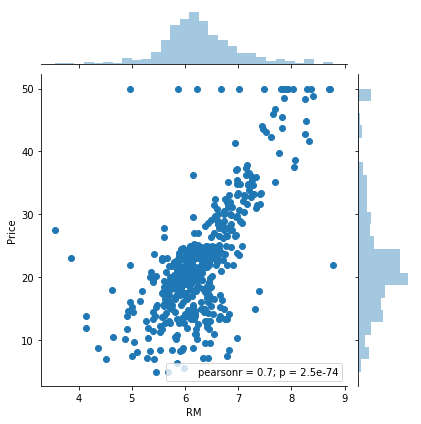

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
import csv
%matplotlib inline

bsdata = load_boston()
df = pd.read_csv("boston.csv")

df = pd.DataFrame(bsdata.data, columns=bsdata.feature_names)
df['Price'] = bsdata.target

sns.jointplot('RM', 'Price', data=df)

# Non centering
print("non centering description")
df.describe()

# 【初心のメモ】pandasを使わずに書く（forで書く）

In [2]:
x_orig = []
y_orig = []
#データからRMとPriceの数値データをlistに格納
# append data from csv to list
with open('boston.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        x_orig.append(row[6])
        y_orig.append(row[14])
        
x_orig_for_loop = x_orig

# csvの1行目は数値データではないので除外
# The first element is not data('RM 'of 'Price') 
x_orig = [float(n) for n in x_orig[1:]]
y_orig = [float(n) for n in y_orig[1:]]

【初心のメモ】Pythonの内包表現は普通のfor分で書き直せますが、できる限り内包表現で書いた方がいいです。  
x_origは内包表現でcsvから一つ一つデータを追加したもの、x_orig2は内包表現と同じ操作をforで書き直したもので、以下のように同じ結果が得られます。

In [3]:
x_orig2 = []
for i in range(1, len(x_orig_for_loop)):
    x_orig2.append(float(x_orig_for_loop[i]))
print('x_orig (list comprehension)')
print(x_orig[:3])
print('x_orig2 (for loop)')
print(x_orig2[:3])

x_orig (list comprehension)
[6.575, 6.421, 7.185]
x_orig2 (for loop)
[6.575, 6.421, 7.185]


In [4]:
# Centering
print("centering description")
df_c = df-df.mean()
x_c = df_c['RM']
y_c = df_c['Price']

df_c.describe()

from statistics import mean
x_c2 = [ i - mean(x_orig) for i in x_orig]
y_c2 = [ i - mean(y_orig) for i in y_orig]

centering description


# Calculate parameter a
$$a=\frac{\sum_{n=1}^{N} x_{n} y_{n}}{\sum_{n=1}^{N} x_{n}^{2}}$$  
aを計算しますが、  
aはpandasを利用してデータ取得したものからの計算結果、a2は上のforループで一つずつデータを取ったものからの計算結果です。どちらも同じ結果が得られます。

a= 9.102108981180303
a2= 9.10210898118031


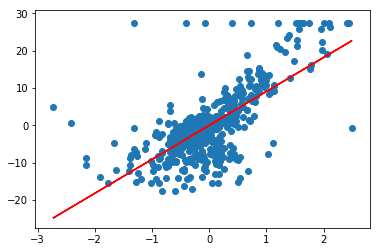

In [5]:
xx = x_c*x_c
xy = x_c*y_c
a = xy.mean()/xx.mean()

xx2 = [ i*i for i in x_c2]
xy2 = [ x_c2[i]*y_c2[i] for i in range(len(x_c2))]
a2 = mean(xy2)/mean(xx2)
print("a=", a)
print("a2=", a2)
plt.plot(x_c, a*x_c, label='y_hat', color='red')
plt.scatter(x_c, y_c, label='y')
plt.show()



In [6]:
# Presiction
# new_x >= 3.56 and new_x < 8.78
new_x = 7
predict_y = a*(new_x - df.mean()['RM']) + df.mean()['Price'] 
print(predict_y)

29.04414209182355


# 参考ページ
https://matplotlib.org/  
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html  
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://scikit-learn.org/stable/  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston  
https://seaborn.pydata.org/  
https://keras.rstudio.com/articles/tutorial_basic_regression.html  
https://www.kaggle.com/xgdbigdata/keras-regression-tutorial  
https://github.com/KatsuhiroMorishita/machine_leaning_samples  
https://www.udemy.com/course/kikagaku_blackbox_1/learn/lecture/8258758#overview  